## CA Wildfire Data Cleaning and EDA

### Import Libraries

In [93]:
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import seaborn as sns

### Read in CSV File

In [79]:
df = pd.read_csv('data.csv')

/var/folders/h_/q1_b1v7x1p3dp6dhckks0t180000gn/T/ipykernel_73634/1507164070.py:1: DtypeWarning: Columns (9,11,12,13,14,15,16,17,18,19,26,27,36,38) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('data.csv')


In [80]:
df.head()

,OBJECTID,Shape,FOD_ID,FPA_ID,SOURCE_SYSTEM_TYPE,SOURCE_SYSTEM,NWCG_REPORTING_AGENCY,NWCG_REPORTING_UNIT_ID,NWCG_REPORTING_UNIT_NAME,SOURCE_REPORTING_UNIT,...,CONT_TIME,FIRE_SIZE,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,OWNER_DESCR,STATE,COUNTY,FIPS_CODE,FIPS_NAME
0,1,b'\x00\x01\xad\x10\x00\x00\xc8\xce\n[_@^\xc0\x...,1,FS-1418826,FED,FS-FIRESTAT,FS,USCAPNF,Plumas National Forest,511,...,1730.0,0.10,A,40.036944,-121.005833,USFS,CA,63.0,6063.0,Plumas County
1,2,b'\x00\x01\xad\x10\x00\x00\xc8\xe594\xe2\x19^\...,2,FS-1418827,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,503,...,1530.0,0.25,A,38.933056,-120.404444,USFS,CA,61.0,6061.0,Placer County
2,3,b'\x00\x01\xad\x10\x00\x00x{\xac \x13/^\xc0@\x...,3,FS-1418835,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,503,...,2024.0,0.10,A,38.984167,-120.735556,STATE OR PRIVATE,CA,17.0,6017.0,El Dorado County
3,4,b'\x00\x01\xad\x10\x00\x00\xc8\x13u\xd7s\xfa]\...,4,FS-1418845,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,503,...,1400.0,0.10,A,38.559167,-119.913333,USFS,CA,3.0,6003.0,Alpine County
4,5,b'\x00\x01\xad\x10\x00\x00\xd0\x11y\xf8\xb6\xf...,5,FS-1418847,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,503,...,1200.0,0.10,A,38.559167,-119.933056,USFS,CA,3.0,6003.0,Alpine County


In [81]:
df.shape

(2303566, 39)

In [82]:
df.isnull().sum()

OBJECTID                               0
Shape                                  0
FOD_ID                                 0
FPA_ID                                 0
SOURCE_SYSTEM_TYPE                     0
SOURCE_SYSTEM                          0
NWCG_REPORTING_AGENCY                  0
NWCG_REPORTING_UNIT_ID                 0
NWCG_REPORTING_UNIT_NAME               0
SOURCE_REPORTING_UNIT                  0
SOURCE_REPORTING_UNIT_NAME             0
LOCAL_FIRE_REPORT_ID             1825891
LOCAL_INCIDENT_ID                 744411
FIRE_CODE                        1906254
FIRE_NAME                         995415
ICS_209_PLUS_INCIDENT_JOIN_ID    2270072
ICS_209_PLUS_COMPLEX_JOIN_ID     2298627
MTBS_ID                          2289696
MTBS_FIRE_NAME                   2289696
COMPLEX_NAME                     2297619
FIRE_YEAR                              0
DISCOVERY_DATE                         0
DISCOVERY_DOY                          0
DISCOVERY_TIME                    789095
NWCG_CAUSE_CLASS

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2303566 entries, 0 to 2303565
Data columns (total 39 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   OBJECTID                       int64  
 1   Shape                          object 
 2   FOD_ID                         int64  
 3   FPA_ID                         object 
 4   SOURCE_SYSTEM_TYPE             object 
 5   SOURCE_SYSTEM                  object 
 6   NWCG_REPORTING_AGENCY          object 
 7   NWCG_REPORTING_UNIT_ID         object 
 8   NWCG_REPORTING_UNIT_NAME       object 
 9   SOURCE_REPORTING_UNIT          object 
 10  SOURCE_REPORTING_UNIT_NAME     object 
 11  LOCAL_FIRE_REPORT_ID           object 
 12  LOCAL_INCIDENT_ID              object 
 13  FIRE_CODE                      object 
 14  FIRE_NAME                      object 
 15  ICS_209_PLUS_INCIDENT_JOIN_ID  object 
 16  ICS_209_PLUS_COMPLEX_JOIN_ID   object 
 17  MTBS_ID                        object 
 18  MT

### Drop Unnecessary Columns

In [84]:
# columns to be dropped due to missing data or unnecessary content 
columns_to_drop = ['Shape', 'SOURCE_SYSTEM_TYPE', 'SOURCE_SYSTEM', 'SOURCE_REPORTING_UNIT_NAME', 'NWCG_REPORTING_UNIT_ID', 'SOURCE_REPORTING_UNIT', 'LOCAL_FIRE_REPORT_ID', 'LOCAL_INCIDENT_ID', 'FIRE_CODE', 'COMPLEX_NAME', 'ICS_209_PLUS_INCIDENT_JOIN_ID', 'ICS_209_PLUS_COMPLEX_JOIN_ID', 'MTBS_ID', 'MTBS_FIRE_NAME', 'NWCG_CAUSE_AGE_CATEGORY', 'CONT_DATE', 'CONT_DOY', 'CONT_TIME', 'FIPS_CODE', 'COUNTY', 'OWNER_DESCR']

In [85]:
# drop columns
df = df.drop(columns=columns_to_drop, axis=1)

### Narrow Down Dataset to CA Fires Only 

In [86]:
# Filtering for only fires from CA
df = df.loc[df['STATE'] == 'CA']

### Rename Columns for Better Readability

In [60]:
# Renaming columns for better readability
df.rename(columns={
    'OBJECTID': 'Object_ID',
    'FOD_ID': 'Fire_Occurrence_Database_ID',
    'FPA_ID': 'Fire_Program_Analysis_ID',
    'NWCG_REPORTING_AGENCY': 'Reporting_Agency',
    'NWCG_REPORTING_UNIT_NAME': 'Reporting_Unit_Name',
    'FIRE_YEAR': 'Fire_Year',
    'DISCOVERY_DATE': 'Discovery_Date',
    'DISCOVERY_DOY': 'Discovery_Day_of_Year',
    'DISCOVERY_TIME': 'Discovery_Time',
    'NWCG_CAUSE_CLASSIFICATION': 'Cause_Classification',
    'NWCG_GENERAL_CAUSE': 'General_Cause',
    'FIRE_SIZE': 'Fire_Size_Acres',
    'FIRE_SIZE_CLASS': 'Fire_Size_Class',
    'FIRE_NAME': 'Fire_Name',
    'LATITUDE': 'Latitude',
    'LONGITUDE': 'Longitude',
    'STATE': 'State',
    'FIPS_NAME': 'FIPS_Name',
}, inplace=True)

In [61]:
df.head()

,Unnamed: 0,Object_ID,Fire_Occurrence_Database_ID,Fire_Program_Analysis_ID,Reporting_Agency,Reporting_Unit_Name,Fire_Year,Discovery_Date,Discovery_Day_of_Year,Discovery_Time,...,State,FIPS_Name,Week_Before_Discovery_Date,Avg_Max_Temp,Avg_Min_Temp,Avg_Precipitation,Avg_Sunshine,Avg_Wind_Speed,Avg_Wind_Gusts,Primary_Wind_Direction
0,0,17,17,FS-1418878,FS,Eldorado National Forest,2004,2004-10-06,280,1415.0,...,CA,Amador County,2004-09-29,68.0750,41.7000,0.026125,37818.11125,6.6875,22.1375,139.875
1,1,18,18,FS-1418881,FS,Eldorado National Forest,2004,2004-10-13,287,1618.0,...,CA,El Dorado County,2004-10-06,70.5375,48.9000,0.001000,37670.53375,10.9750,33.3750,151.000
2,2,549,556,FS-1420078,FS,Sequoia National Forest,2005,2005-07-09,190,1313.0,...,CA,NaN,2005-07-02,93.3875,68.7500,0.000000,48823.62625,6.7500,24.2500,304.500
3,3,1500,1514,FS-1422180,FS,Cleveland National Forest,2005,2005-08-24,236,1110.0,...,CA,NaN,2005-08-17,85.4250,64.9000,0.000000,43949.38375,7.7750,20.0125,284.875
4,4,2723,2740,FS-1424833,FS,Mendocino National Forest,2005,2005-09-16,259,1435.0,...,CA,NaN,2005-09-09,76.4500,52.9875,0.000000,41695.45250,8.6250,27.2125,295.375


### Change Date Format and Add Column for Future Analysis 

In [62]:
df['Discovery_Date'].head()

0    2004-10-06
1    2004-10-13
2    2005-07-09
3    2005-08-24
4    2005-09-16
Name: Discovery_Date, dtype: object

In [63]:
df['Discovery_Date'] = pd.to_datetime(df['Discovery_Date'])

In [64]:
df['Week_Before_Discovery_Date'] = df['Discovery_Date'] - timedelta(days=7)

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5428 entries, 0 to 5427
Data columns (total 26 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Unnamed: 0                   5428 non-null   int64         
 1   Object_ID                    5428 non-null   int64         
 2   Fire_Occurrence_Database_ID  5428 non-null   int64         
 3   Fire_Program_Analysis_ID     5428 non-null   object        
 4   Reporting_Agency             5428 non-null   object        
 5   Reporting_Unit_Name          5428 non-null   object        
 6   Fire_Year                    5428 non-null   int64         
 7   Discovery_Date               5428 non-null   datetime64[ns]
 8   Discovery_Day_of_Year        5428 non-null   int64         
 9   Discovery_Time               4367 non-null   float64       
 10  Cause_Classification         5428 non-null   object        
 11  General_Cause                5428 non-null 

### EDA and Key Visualizations of Wildfire Dataset

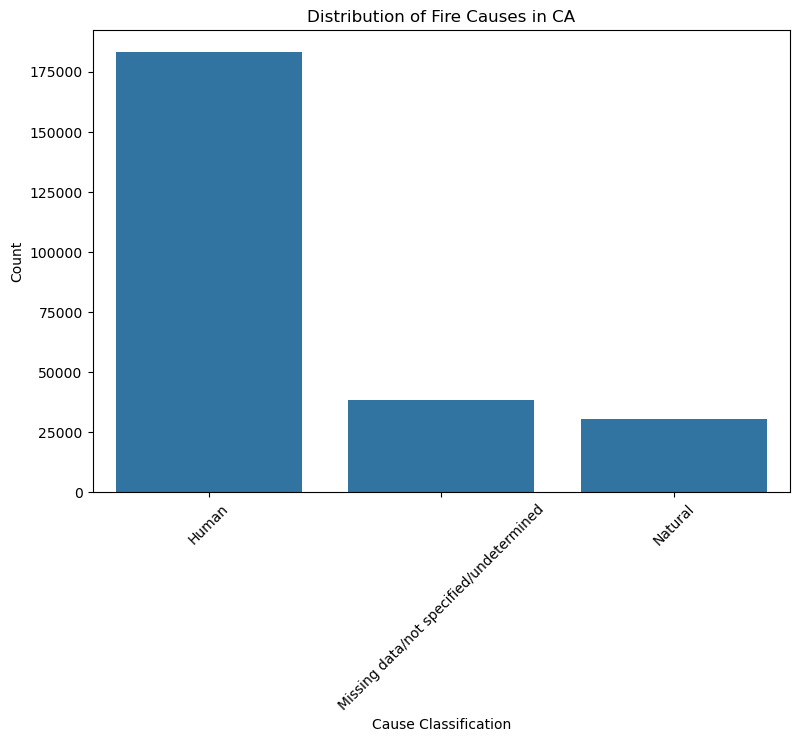

In [95]:
# Cause Classification distribution
plt.figure(figsize=(9, 6))
sns.countplot(data=df, x='Cause_Classification', order=df['Cause_Classification'].value_counts().index)
plt.title('Distribution of Fire Causes in CA')
plt.xlabel('Cause Classification')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

/var/folders/h_/q1_b1v7x1p3dp6dhckks0t180000gn/T/ipykernel_73634/3882237456.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x='General_Cause', order=df['General_Cause'].value_counts().index, palette='Set2')


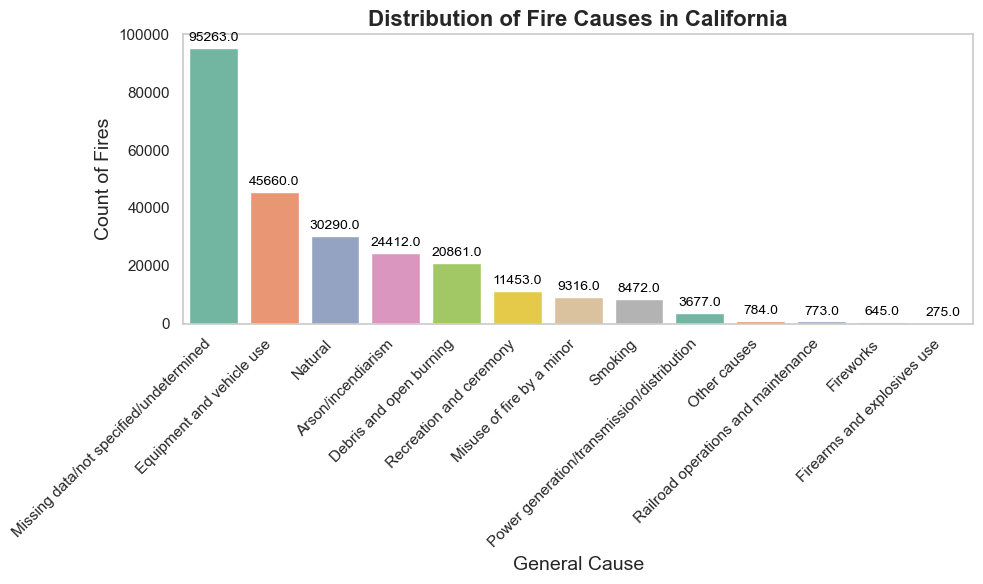

In [99]:
# Specific Fire Cause distribution

sns.set_theme(style="whitegrid")

plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df, x='General_Cause', order=df['General_Cause'].value_counts().index, palette='Set2')

# Adding data labels on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='baseline', fontsize=10, color='black', 
                xytext=(0, 5), textcoords='offset points')


plt.title('Distribution of Fire Causes in California', fontsize=16, fontweight='bold')
plt.xlabel('Specific Cause', fontsize=14)
plt.ylabel('Count of Fires', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

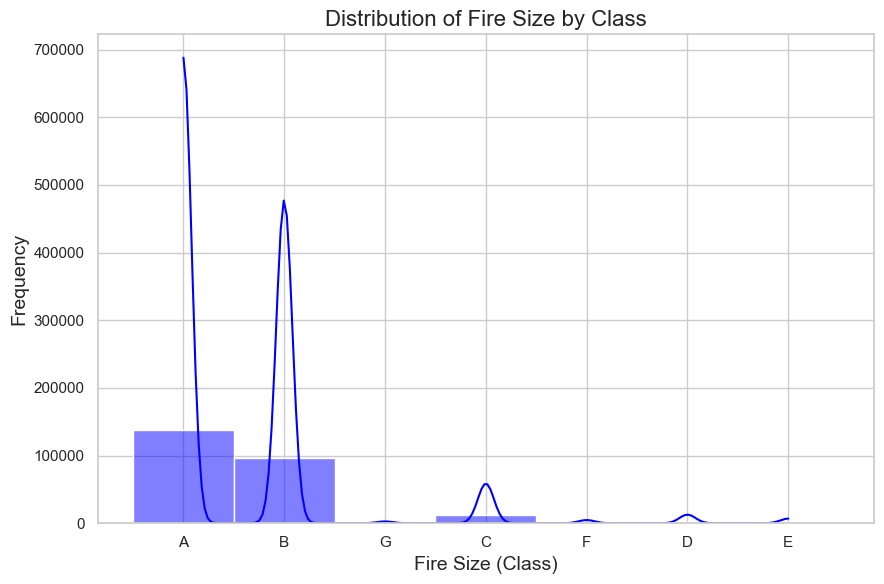

In [104]:
# Fire Size Distribution by Class
plt.figure(figsize=(9, 6))
sns.histplot(df['Fire_Size_Class'], bins=30, kde=True, color='blue')
plt.title('Distribution of Fire Size by Class', fontsize=16)
plt.xlabel('Fire Size (Class)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(True)
plt.tight_layout()
plt.show()

/var/folders/h_/q1_b1v7x1p3dp6dhckks0t180000gn/T/ipykernel_73634/540550002.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Fire_Size_Class', order=df['Fire_Size_Class'].value_counts().index, palette='Paired')


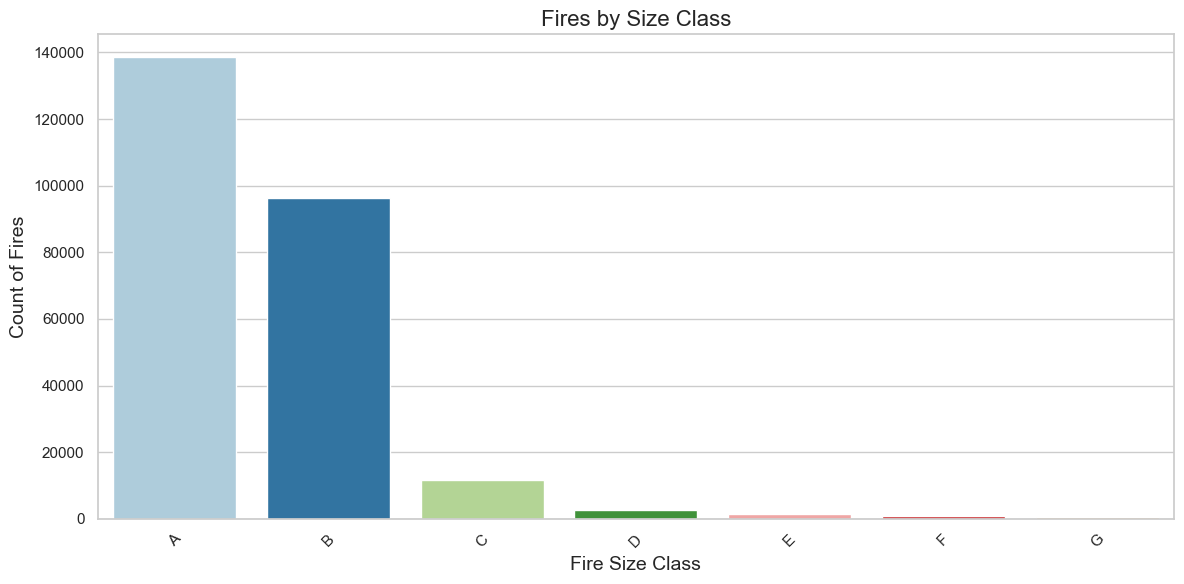

In [117]:
# Fire Size by Class (just diff type of graph)
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Fire_Size_Class', order=df['Fire_Size_Class'].value_counts().index, palette='Paired')
plt.title('Fires by Size Class', fontsize=16)
plt.xlabel('Fire Size Class', fontsize=14)
plt.ylabel('Count of Fires', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

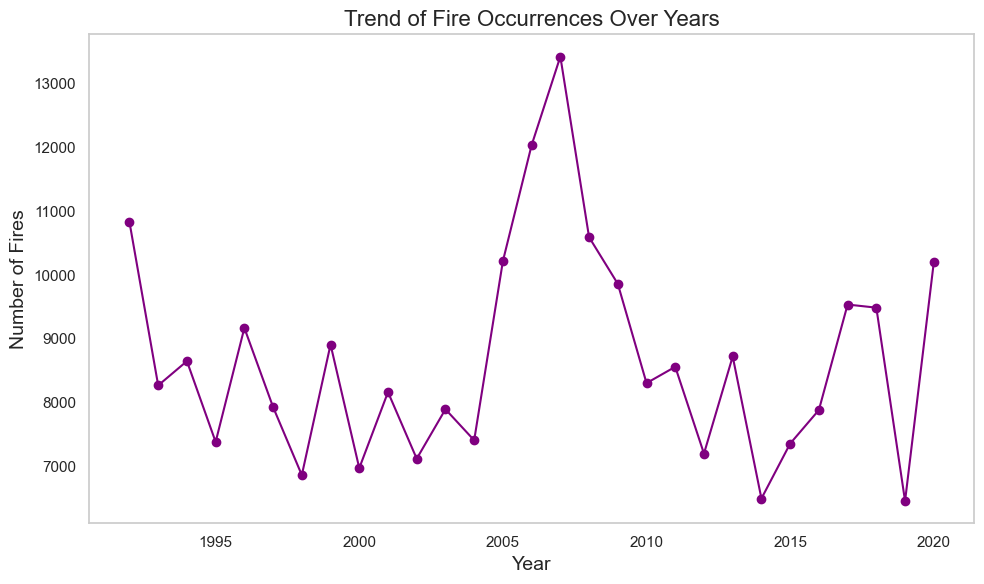

In [105]:
# Fire Occurences Over Years
plt.figure(figsize=(10, 6))
df.groupby('Fire_Year').size().plot(kind='line', marker='o', color='purple')
plt.title('Trend of Fire Occurrences Over Years', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Fires', fontsize=14)
plt.grid()
plt.tight_layout()
plt.show()

/var/folders/h_/q1_b1v7x1p3dp6dhckks0t180000gn/T/ipykernel_73634/3473182892.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='General_Cause', y='Fire_Size_Acres', palette='Set1')


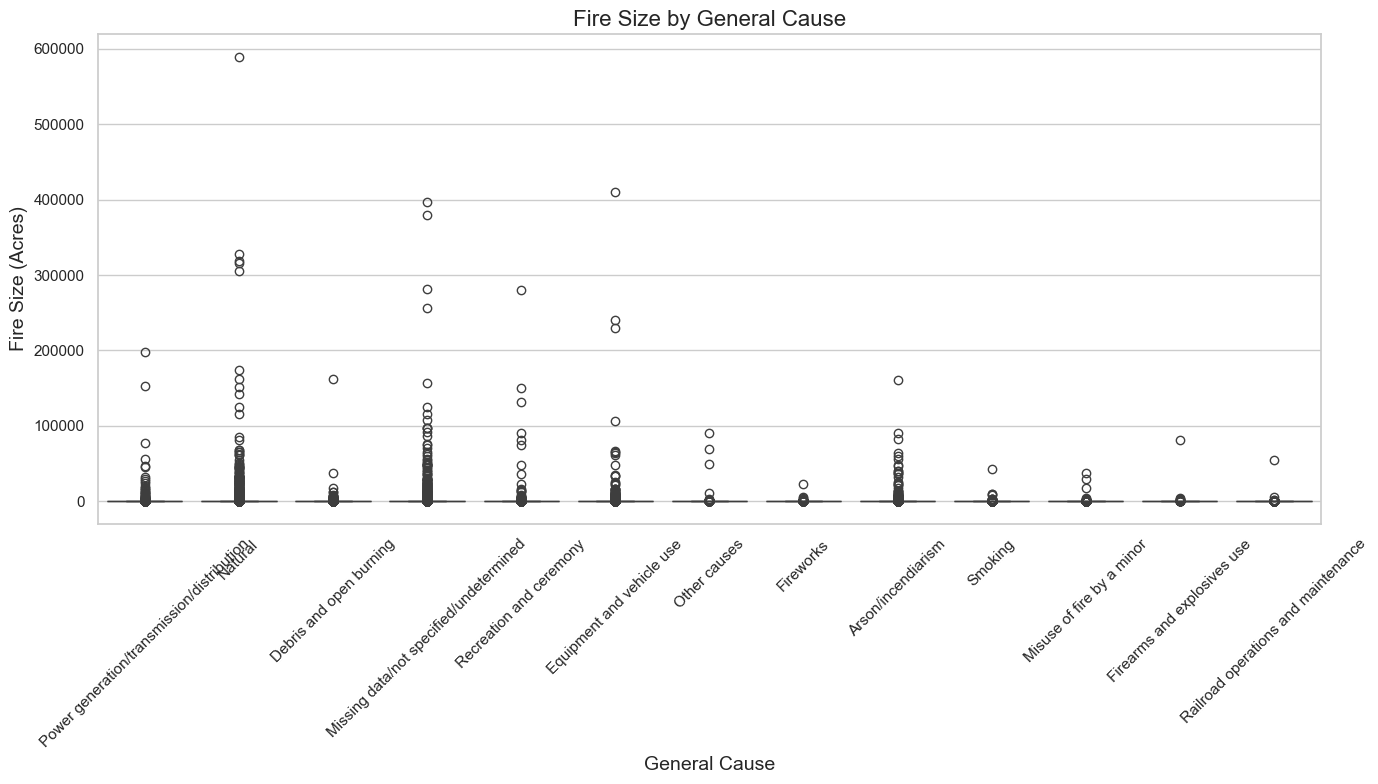

In [106]:
# Fire Size by Cause
plt.figure(figsize=(14, 8))
sns.boxplot(data=df, x='General_Cause', y='Fire_Size_Acres', palette='Set1')
plt.title('Fire Size by General Cause', fontsize=16)
plt.xlabel('General Cause', fontsize=14)
plt.ylabel('Fire Size (Acres)', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

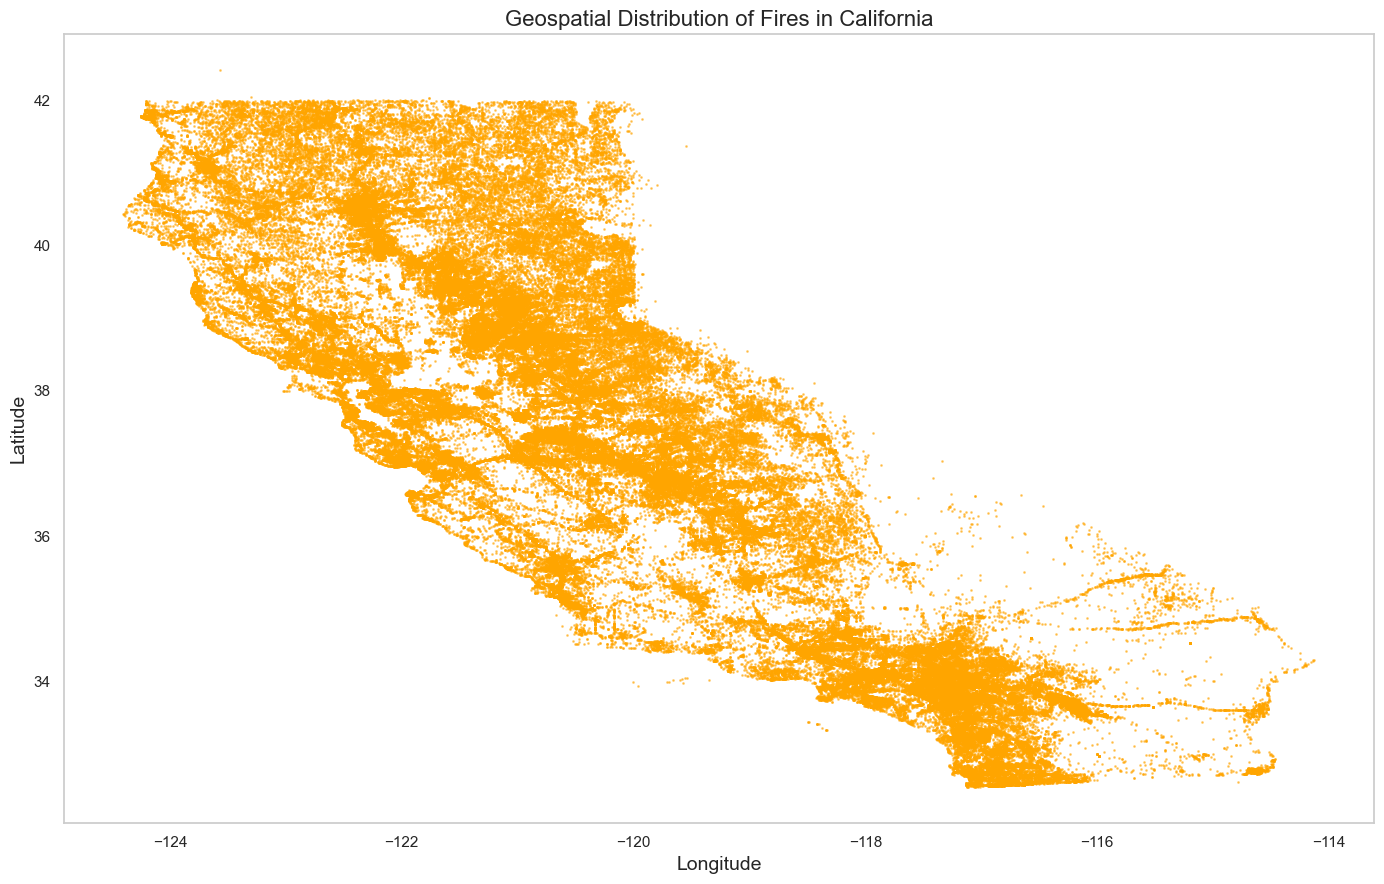

In [109]:
# Geospatial Distribution of Fires
plt.figure(figsize=(14, 9))
plt.scatter(df['Longitude'], df['Latitude'], alpha=0.5, color='orange', s=1)
plt.title('Geospatial Distribution of Fires in California', fontsize=16)
plt.xlabel('Longitude', fontsize=14)
plt.ylabel('Latitude', fontsize=14)
plt.grid()
plt.tight_layout()
plt.show()

/var/folders/h_/q1_b1v7x1p3dp6dhckks0t180000gn/T/ipykernel_73634/3850038241.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Month', palette='Paired')


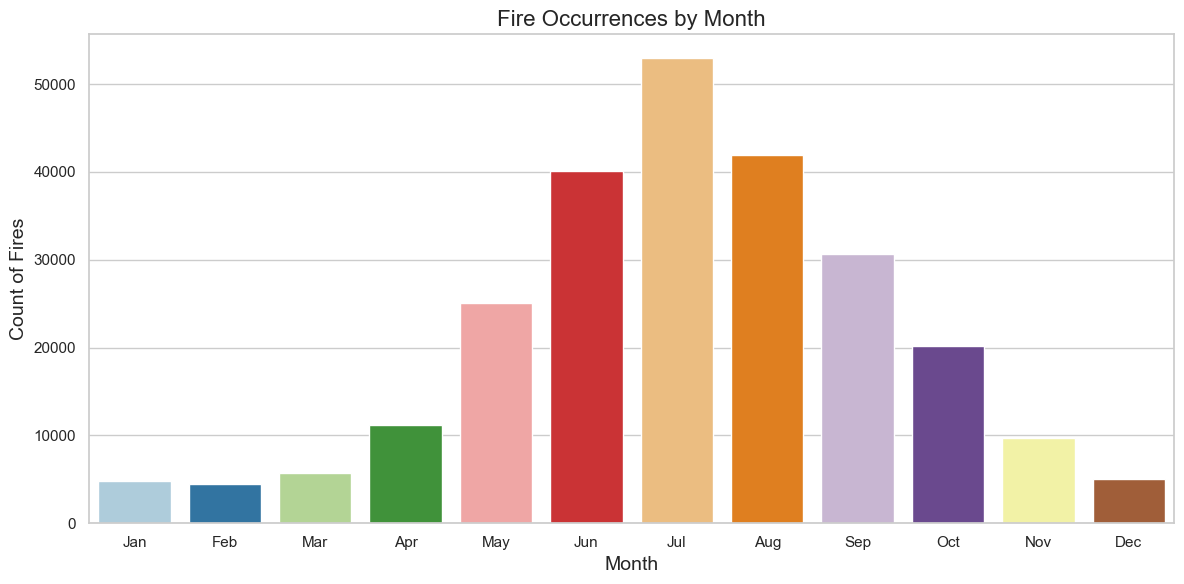

In [110]:
# Fire Occurences by Month 
df['Month'] = df['Discovery_Date'].dt.month
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Month', palette='Paired')
plt.title('Fire Occurrences by Month', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Count of Fires', fontsize=14)
plt.xticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.tight_layout()
plt.show()

There appears to be an obvious 'fire season'

/var/folders/h_/q1_b1v7x1p3dp6dhckks0t180000gn/T/ipykernel_73634/630368131.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Fire_Year', y='Fire_Size_Acres', palette='Set2')


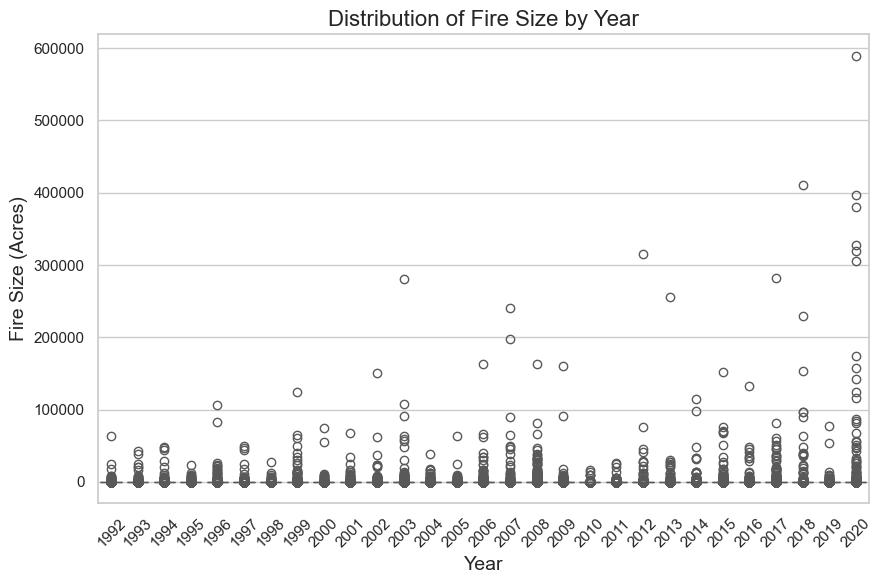

In [114]:
# Fire Size Distribution by Year
plt.figure(figsize=(9, 6))
sns.boxplot(data=df, x='Fire_Year', y='Fire_Size_Acres', palette='Set2')
plt.title('Distribution of Fire Size by Year', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Fire Size (Acres)', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Increase in number of larger fires...why? 

In [ ]:
### 

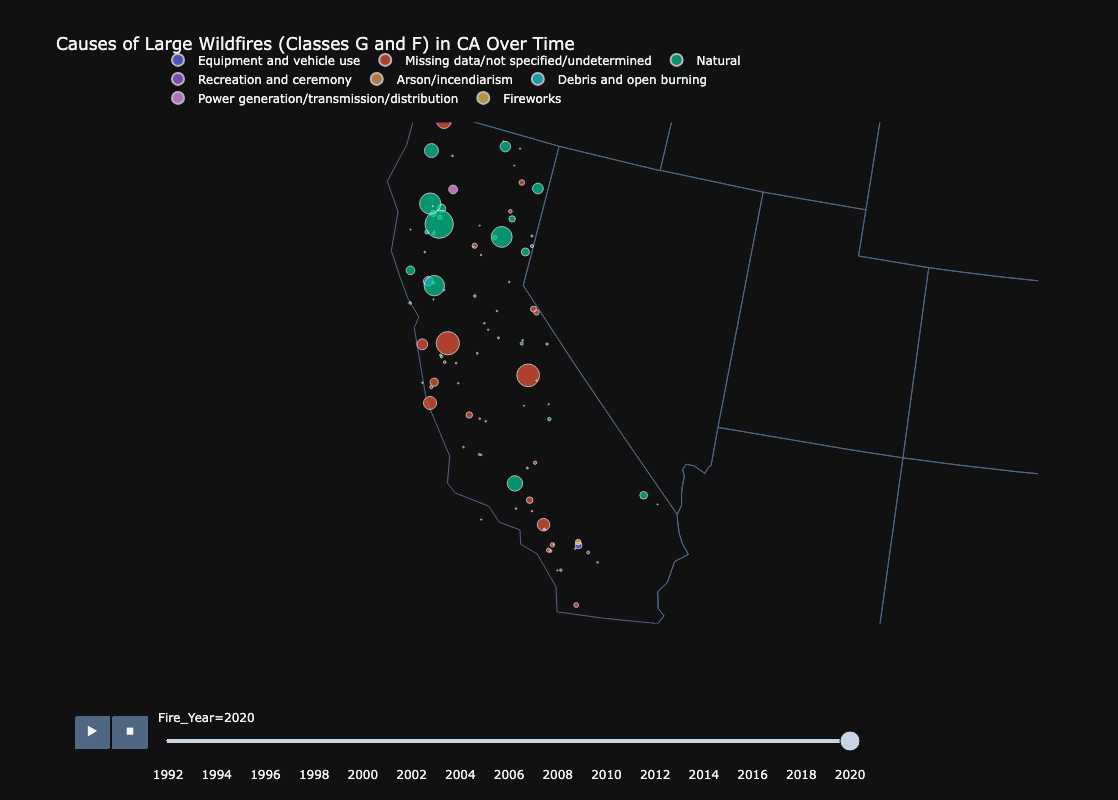

In [125]:
import plotly.express as px

ca_fires = df[((df['Fire_Size_Class'] == 'G') | (df['Fire_Size_Class'] == 'F'))].sort_values('Fire_Year')

# Create interactive map
interactive_map_ca = px.scatter_geo(
    ca_fires,
    lon='Longitude',  
    lat='Latitude', 
    size='Fire_Size_Acres',  # Size of the marker based on fire size
    color='General_Cause',  # Color based on cause of the fire
    hover_name='Fire_Size_Class',  # Hover data to display fire class (size)
    animation_frame='Fire_Year',  # animation over the years
    labels={'General_Cause': '', 'Fire_Year': 'Fire_Year'},  
    title='Causes of Large Wildfires (Classes G and F) in CA Over Time' 
)

# Update layout to make map look better
interactive_map_ca.update_layout(
    width=800,  
    height=800,  
    template="plotly_dark",  
    geo_scope='usa',  # Limit map to USA
    legend=dict(
        orientation="h",  
        yanchor="top",
        y=1.1,  # Position of the legend
        xanchor="left",
        x=0.1
    ),
    geo=dict(
        center=dict(lat=37.4, lon=-119.42),  # Center of the map around CA
        projection_scale=3.5  # Zoom level
    )
)

    
interactive_map_ca.show()

## EDA Using New CSV

In [58]:
df = pd.read_csv('ca_wildfire_weather.csv')

In [59]:
df.head()

,Unnamed: 0,Object_ID,Fire_Occurrence_Database_ID,Fire_Program_Analysis_ID,Reporting_Agency,Reporting_Unit_Name,Fire_Year,Discovery_Date,Discovery_Day_of_Year,Discovery_Time,...,State,FIPS_Name,Week_Before_Discovery_Date,Avg_Max_Temp,Avg_Min_Temp,Avg_Precipitation,Avg_Sunshine,Avg_Wind_Speed,Avg_Wind_Gusts,Primary_Wind_Direction
0,0,17,17,FS-1418878,FS,Eldorado National Forest,2004,2004-10-06,280,1415.0,...,CA,Amador County,2004-09-29,68.0750,41.7000,0.026125,37818.11125,6.6875,22.1375,139.875
1,1,18,18,FS-1418881,FS,Eldorado National Forest,2004,2004-10-13,287,1618.0,...,CA,El Dorado County,2004-10-06,70.5375,48.9000,0.001000,37670.53375,10.9750,33.3750,151.000
2,2,549,556,FS-1420078,FS,Sequoia National Forest,2005,2005-07-09,190,1313.0,...,CA,NaN,2005-07-02,93.3875,68.7500,0.000000,48823.62625,6.7500,24.2500,304.500
3,3,1500,1514,FS-1422180,FS,Cleveland National Forest,2005,2005-08-24,236,1110.0,...,CA,NaN,2005-08-17,85.4250,64.9000,0.000000,43949.38375,7.7750,20.0125,284.875
4,4,2723,2740,FS-1424833,FS,Mendocino National Forest,2005,2005-09-16,259,1435.0,...,CA,NaN,2005-09-09,76.4500,52.9875,0.000000,41695.45250,8.6250,27.2125,295.375


In [66]:
df.columns

Index(['Unnamed: 0', 'Object_ID', 'Fire_Occurrence_Database_ID',
       'Fire_Program_Analysis_ID', 'Reporting_Agency', 'Reporting_Unit_Name',
       'Fire_Year', 'Discovery_Date', 'Discovery_Day_of_Year',
       'Discovery_Time', 'Cause_Classification', 'General_Cause',
       'Fire_Size_Acres', 'Fire_Size_Class', 'Latitude', 'Longitude', 'State',
       'FIPS_Name', 'Week_Before_Discovery_Date', 'Avg_Max_Temp',
       'Avg_Min_Temp', 'Avg_Precipitation', 'Avg_Sunshine', 'Avg_Wind_Speed',
       'Avg_Wind_Gusts', 'Primary_Wind_Direction'],
      dtype='object')

In [68]:
print(df.info())

print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5428 entries, 0 to 5427
Data columns (total 26 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Unnamed: 0                   5428 non-null   int64         
 1   Object_ID                    5428 non-null   int64         
 2   Fire_Occurrence_Database_ID  5428 non-null   int64         
 3   Fire_Program_Analysis_ID     5428 non-null   object        
 4   Reporting_Agency             5428 non-null   object        
 5   Reporting_Unit_Name          5428 non-null   object        
 6   Fire_Year                    5428 non-null   int64         
 7   Discovery_Date               5428 non-null   datetime64[ns]
 8   Discovery_Day_of_Year        5428 non-null   int64         
 9   Discovery_Time               4367 non-null   float64       
 10  Cause_Classification         5428 non-null   object        
 11  General_Cause                5428 non-null 

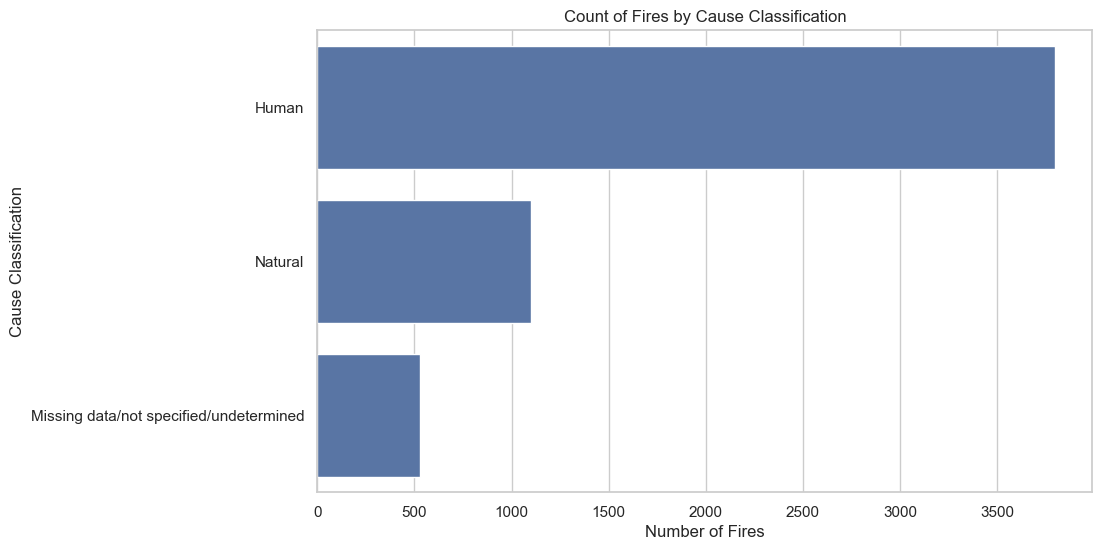

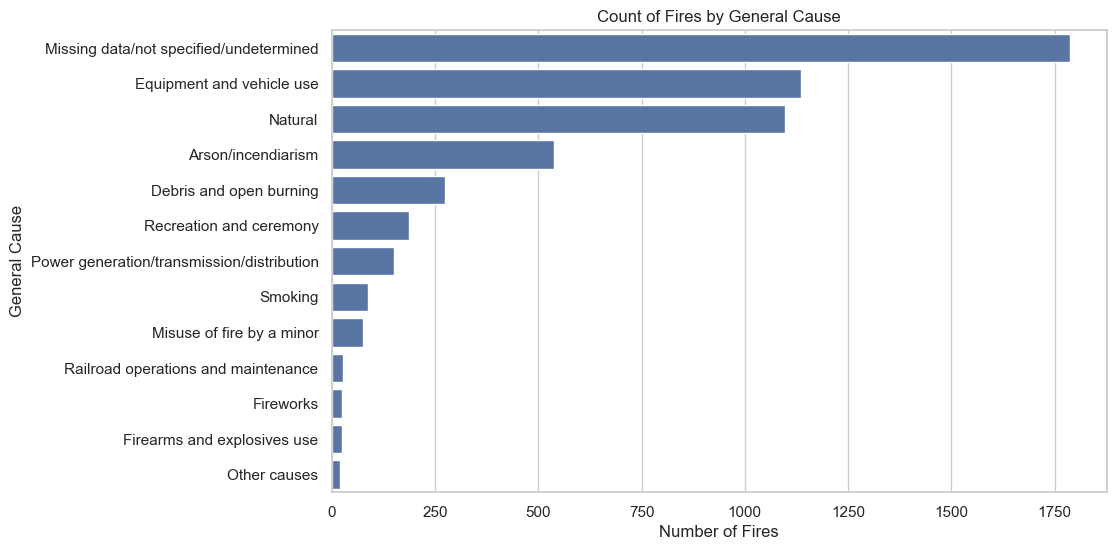

In [70]:
# Bar plot for Cause Classification (repeated graphs just checking the new csv)
plt.figure(figsize=(10, 6))
sns.countplot(y='Cause_Classification', data=df, order=df['Cause_Classification'].value_counts().index)
plt.title('Count of Fires by Cause Classification')
plt.xlabel('Number of Fires')
plt.ylabel('Cause Classification')
plt.show()

# Bar plot for General Cause
plt.figure(figsize=(10, 6))
sns.countplot(y='General_Cause', data=df, order=df['General_Cause'].value_counts().index)
plt.title('Count of Fires by General Cause')
plt.xlabel('Number of Fires')
plt.ylabel('General Cause')
plt.show()

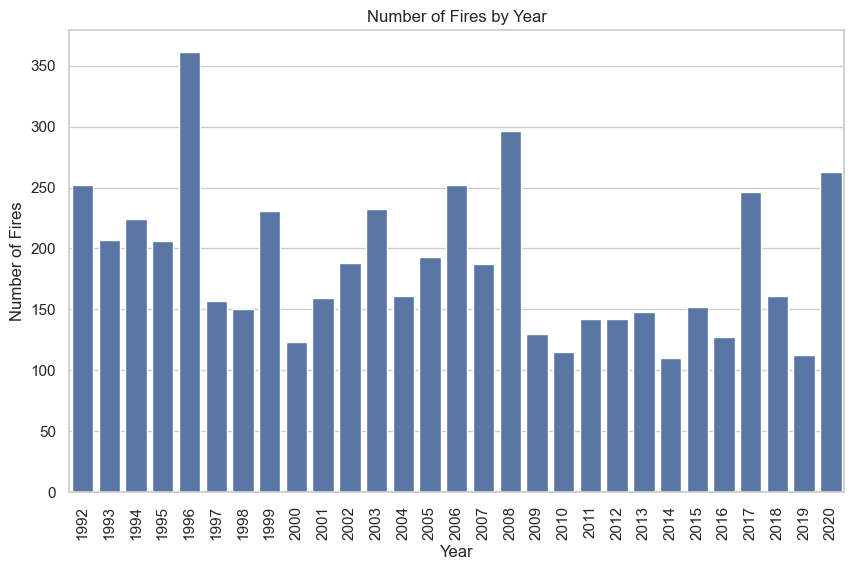

In [75]:
# Count of fires per year in chronological order
plt.figure(figsize=(10, 6))

# Sort the years in ascending order and plot
sns.countplot(x='Fire_Year', data=df, order=sorted(df['Fire_Year'].unique()))

plt.title('Number of Fires by Year')
plt.xlabel('Year')
plt.ylabel('Number of Fires')
plt.xticks(rotation=90)
plt.show()

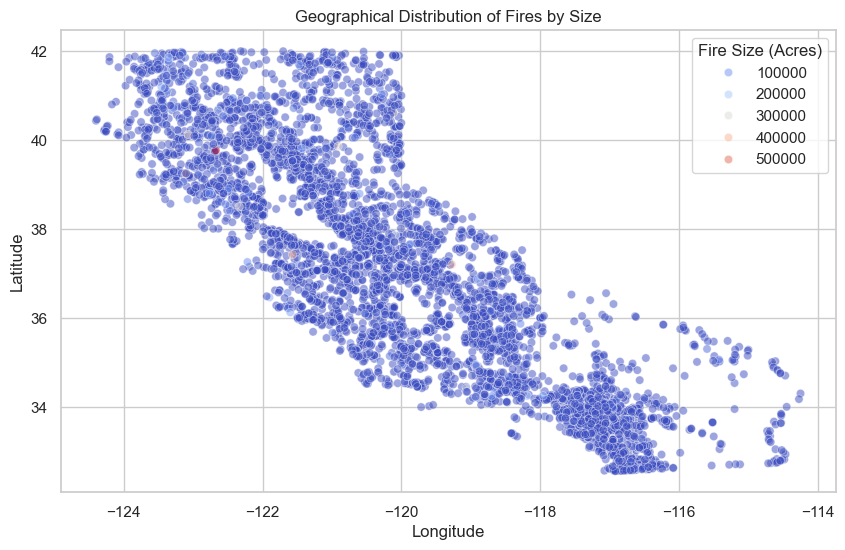

In [72]:
# Scatter plot for geographical distribution of fires
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Longitude', y='Latitude', hue='Fire_Size_Acres', data=df, palette='coolwarm', alpha=0.5)
plt.title('Geographical Distribution of Fires by Size')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Fire Size (Acres)', loc='upper right')
plt.show()

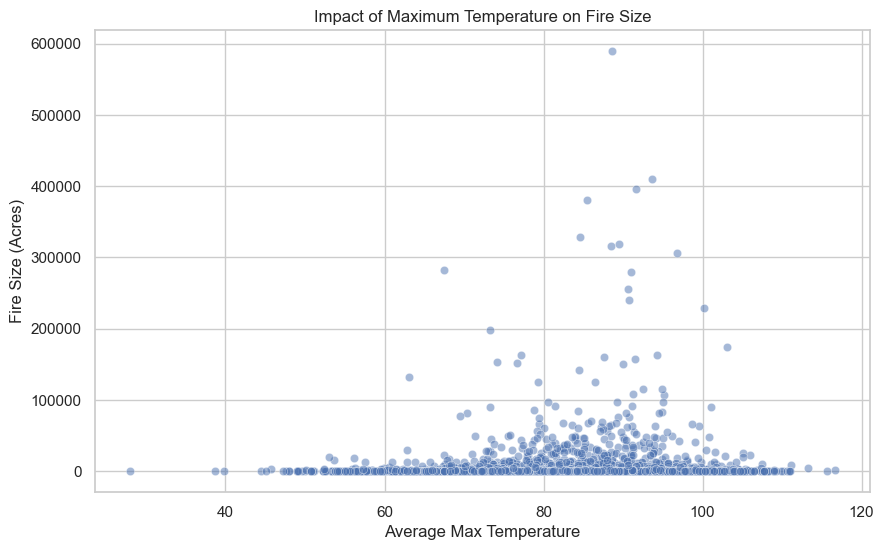

In [76]:
# Scatter plot for Max Temperature vs Fire Size
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Avg_Max_Temp', y='Fire_Size_Acres', data=df, alpha=0.5)
plt.title('Impact of Maximum Temperature on Fire Size')
plt.xlabel('Average Max Temperature')
plt.ylabel('Fire Size (Acres)')
plt.show()

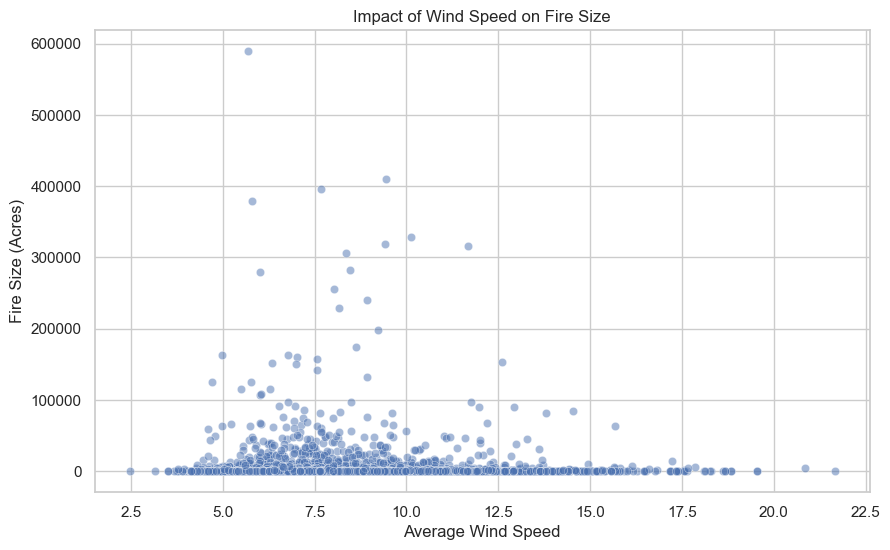

In [79]:
# Scatter plot for Wind Speed vs Fire Size
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Avg_Wind_Speed', y='Fire_Size_Acres', data=df, alpha=0.5)
plt.title('Impact of Wind Speed on Fire Size')
plt.xlabel('Average Wind Speed')
plt.ylabel('Fire Size (Acres)')
plt.show()

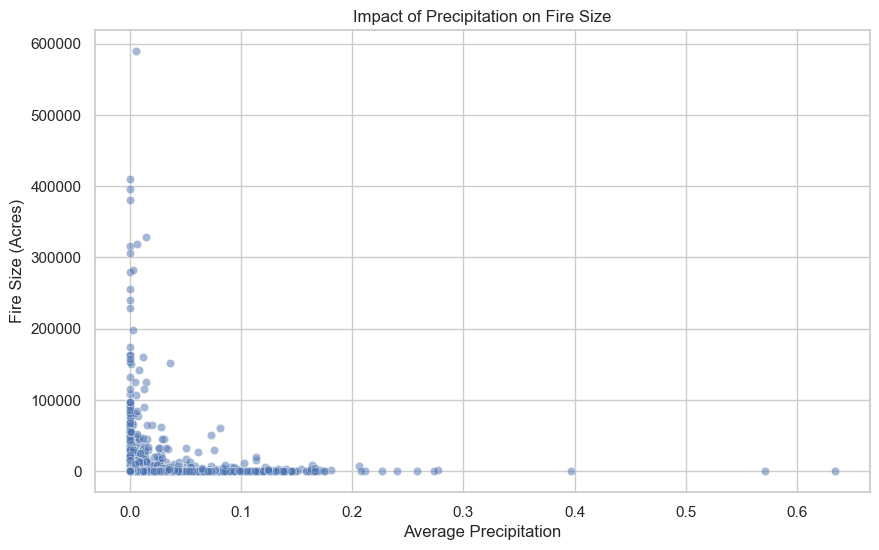

In [80]:
# Scatter plot for Precipitation vs Fire Size
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Avg_Precipitation', y='Fire_Size_Acres', data=df, alpha=0.5)
plt.title('Impact of Precipitation on Fire Size')
plt.xlabel('Average Precipitation')
plt.ylabel('Fire Size (Acres)')
plt.show()

/var/folders/h_/q1_b1v7x1p3dp6dhckks0t180000gn/T/ipykernel_75753/2639456207.py:11: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


/var/folders/h_/q1_b1v7x1p3dp6dhckks0t180000gn/T/ipykernel_75753/2639456207.py:18: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


/var/folders/h_/q1_b1v7x1p3dp6dhckks0t180000gn/T/ipykernel_75753/2639456207.py:25: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




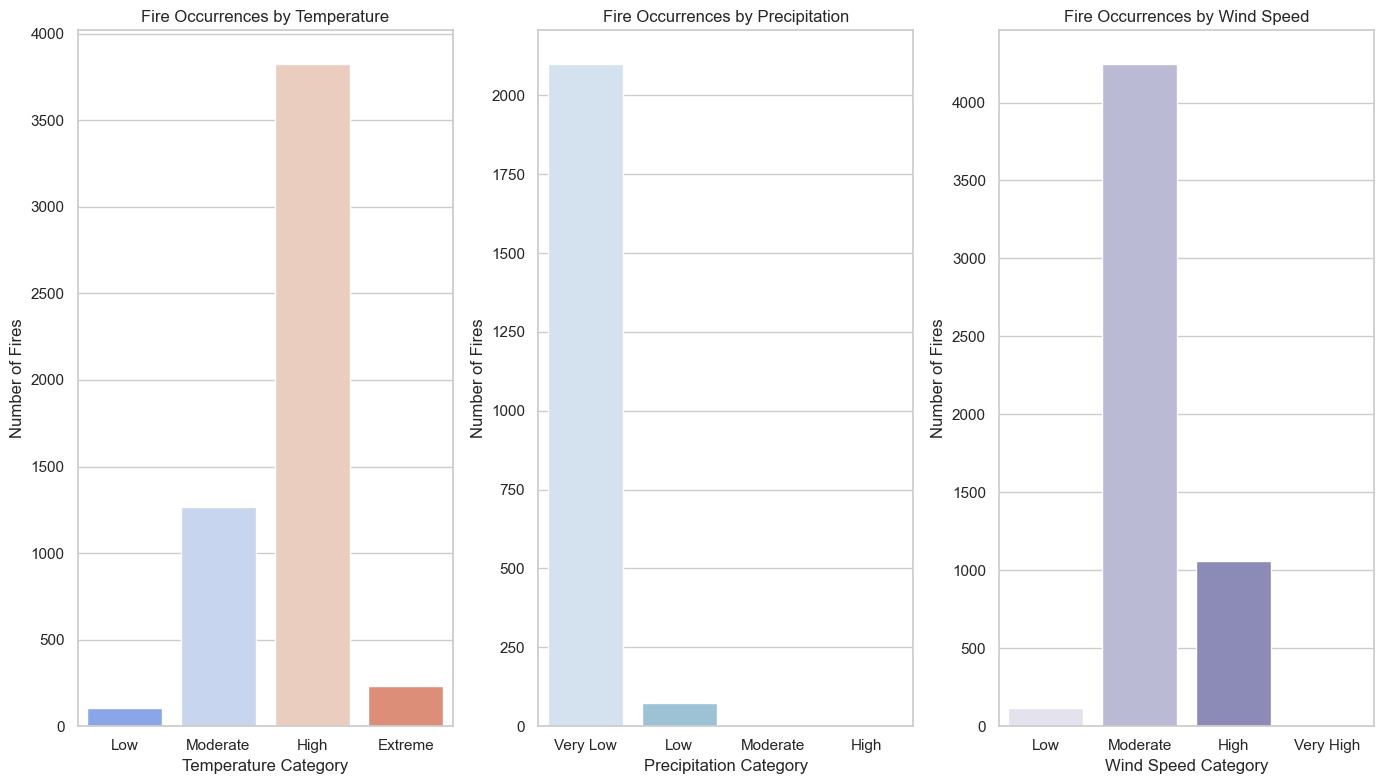

In [82]:
# Create categories for temperature, precipitation, and wind speed
df['Temp_Category'] = pd.cut(df['Avg_Max_Temp'], bins=[0, 60, 80, 100, 120], labels=['Low', 'Moderate', 'High', 'Extreme'])
df['Precipitation_Category'] = pd.cut(df['Avg_Precipitation'], bins=[0, 0.1, 0.5, 1, 5], labels=['Very Low', 'Low', 'Moderate', 'High'])
df['Wind_Category'] = pd.cut(df['Avg_Wind_Speed'], bins=[0, 5, 10, 20, 30], labels=['Low', 'Moderate', 'High', 'Very High'])

# Countplot of fire occurrences by weather categories
plt.figure(figsize=(14, 8))

# Temperature
plt.subplot(1, 3, 1)
sns.countplot(x='Temp_Category', data=df, palette='coolwarm')
plt.title('Fire Occurrences by Temperature')
plt.xlabel('Temperature Category')
plt.ylabel('Number of Fires')

# Precipitation
plt.subplot(1, 3, 2)
sns.countplot(x='Precipitation_Category', data=df, palette='Blues')
plt.title('Fire Occurrences by Precipitation')
plt.xlabel('Precipitation Category')
plt.ylabel('Number of Fires')

# Wind Speed
plt.subplot(1, 3, 3)
sns.countplot(x='Wind_Category', data=df, palette='Purples')
plt.title('Fire Occurrences by Wind Speed')
plt.xlabel('Wind Speed Category')
plt.ylabel('Number of Fires')

plt.tight_layout()
plt.show()

Selecting Ranges:
- These ranges are based on studies and guidelines from fire ecology and meteorology literature ap (I asked chatgpt for them so need to make sure thats accurate if using these)
- could also use statistical analysis (like quantiles) to create more data-driven categories based on our specific dataset--attempted to below

In [83]:
# Descriptive statistics
print(df[['Avg_Max_Temp', 'Avg_Precipitation', 'Avg_Wind_Speed']].describe())

       Avg_Max_Temp  Avg_Precipitation  Avg_Wind_Speed
count   5428.000000        5428.000000     5428.000000
mean      85.488790           0.007666        8.427466
std        9.974239           0.025127        2.187946
min       27.987500           0.000000        2.475000
25%       79.925000           0.000000        6.937500
50%       86.775000           0.000000        8.062500
75%       92.275000           0.004000        9.600000
max      116.600000           0.633750       21.650000


In [96]:
import pandas as pd
import numpy as np

# Define bins based on descriptive statistics for Avg_Max_Temp
temp_bins = [0, 79.925, 86.775, 92.275, 116.6]  # Bins from quartiles
temp_labels = ['Low', 'Moderate', 'High', 'Extreme']
df['Temp_Category'] = pd.cut(df['Avg_Max_Temp'], bins=temp_bins, labels=temp_labels, include_lowest=True)

# Define bins for Avg_Precipitation
precipitation_bins = [-0.001, 0, 0.004, 0.025, 0.634]  # Including 0 for Very Low
precipitation_labels = ['Very Low', 'Low', 'Moderate', 'High']
df['Precip_Category'] = pd.cut(df['Avg_Precipitation'], bins=precipitation_bins, labels=precipitation_labels, include_lowest=True)

# Define bins for Avg_Wind_Speed
wind_bins = [0, 6.9375, 8.0625, 9.600, 21.65]  # Bins from quartiles
wind_labels = ['Calm', 'Breezy', 'Windy', 'Very Windy']
df['Wind_Category'] = pd.cut(df['Avg_Wind_Speed'], bins=wind_bins, labels=wind_labels, include_lowest=True)

# Display the new categories
print(df[['Avg_Max_Temp', 'Temp_Category']].head())
print(df[['Avg_Precipitation', 'Precip_Category']].head())
print(df[['Avg_Wind_Speed', 'Wind_Category']].head())

   Avg_Max_Temp Temp_Category
0       68.0750           Low
1       70.5375           Low
2       93.3875       Extreme
3       85.4250      Moderate
4       76.4500           Low
   Avg_Precipitation Precip_Category
0           0.026125            High
1           0.001000             Low
2           0.000000        Very Low
3           0.000000        Very Low
4           0.000000        Very Low
   Avg_Wind_Speed Wind_Category
0          6.6875          Calm
1         10.9750    Very Windy
2          6.7500          Calm
3          7.7750        Breezy
4          8.6250         Windy


In [90]:
# Adjusted bins for Avg_Max_Temp
temp_bins = [0, 79.925, 86.775, 92.275, 100, 116.6]  # Adjusted to include a clear Extreme category
temp_labels = ['Low', 'Moderate', 'High', 'Very High', 'Extreme']

# Adjusted bins for Avg_Precipitation
precipitation_bins = [-0.001, 0, 0.001, 0.01, 0.634]  # More granular bins for precipitation
precipitation_labels = ['Very Low', 'Low', 'Moderate', 'High']

# Adjusted bins for Avg_Wind_Speed
wind_bins = [0, 5, 10, 15, 21.65]  # More granularity in wind categories
wind_labels = ['Calm', 'Breezy', 'Windy', 'Very Windy']

# Creating categories again
df['Temp_Category'] = pd.cut(df['Avg_Max_Temp'], bins=temp_bins, labels=temp_labels, include_lowest=True)
df['Precip_Category'] = pd.cut(df['Avg_Precipitation'], bins=precipitation_bins, labels=precipitation_labels, include_lowest=True)
df['Wind_Category'] = pd.cut(df['Avg_Wind_Speed'], bins=wind_bins, labels=wind_labels, include_lowest=True)

# Display updated categories
print(df[['Avg_Max_Temp', 'Temp_Category']].head())
print(df[['Avg_Precipitation', 'Precip_Category']].head())
print(df[['Avg_Wind_Speed', 'Wind_Category']].head())

   Avg_Max_Temp Temp_Category
0       68.0750           Low
1       70.5375           Low
2       93.3875     Very High
3       85.4250      Moderate
4       76.4500           Low
   Avg_Precipitation Precip_Category
0           0.026125            High
1           0.001000             Low
2           0.000000        Very Low
3           0.000000        Very Low
4           0.000000        Very Low
   Avg_Wind_Speed Wind_Category
0          6.6875        Breezy
1         10.9750         Windy
2          6.7500        Breezy
3          7.7750        Breezy
4          8.6250        Breezy


/var/folders/h_/q1_b1v7x1p3dp6dhckks0t180000gn/T/ipykernel_75753/499898863.py:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


/var/folders/h_/q1_b1v7x1p3dp6dhckks0t180000gn/T/ipykernel_75753/499898863.py:13: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


/var/folders/h_/q1_b1v7x1p3dp6dhckks0t180000gn/T/ipykernel_75753/499898863.py:21: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




Text(0, 0.5, 'Number of Fires')

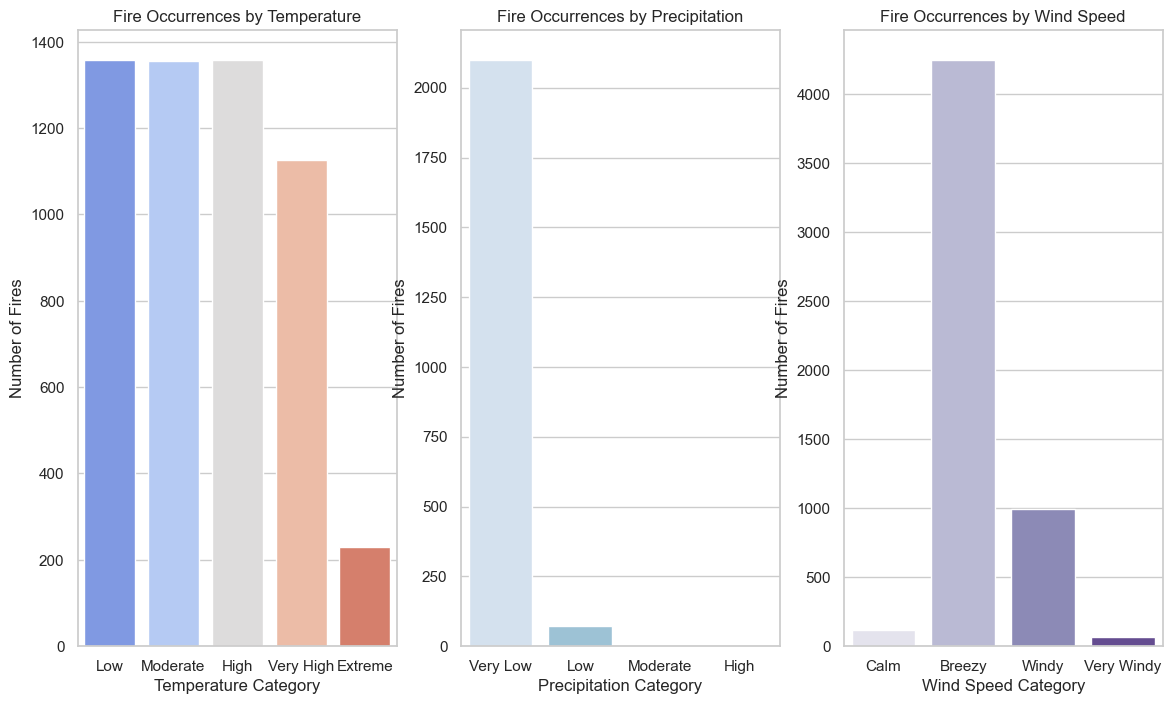

In [95]:
# Countplot of fire occurrences by weather categories
plt.figure(figsize=(14, 8))

# Temperature
plt.subplot(1, 3, 1)
sns.countplot(x='Temp_Category', data=df, palette='coolwarm')
plt.title('Fire Occurrences by Temperature')
plt.xlabel('Temperature Category')
plt.ylabel('Number of Fires')

# Precipitation
plt.subplot(1, 3, 2)
sns.countplot(x='Precipitation_Category', data=df, palette='Blues')
plt.title('Fire Occurrences by Precipitation')
plt.xlabel('Precipitation Category')
plt.ylabel('Number of Fires')


# Wind Speed
plt.subplot(1, 3, 3)
sns.countplot(x='Wind_Category', data=df, palette='Purples')
plt.title('Fire Occurrences by Wind Speed')
plt.xlabel('Wind Speed Category')
plt.ylabel('Number of Fires')